### デバッグ用

In [1]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))

### モジュールインポート

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import clone
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from kennard_stone import KennardStone
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 定数等

In [3]:
SEED = 334
rf = RandomForestRegressor(n_estimators = 100, random_state = SEED, n_jobs = -1)

### サンプルデータ

In [4]:
boston = load_boston()
X = pd.DataFrame(boston['data'], columns = boston['feature_names'])
y = pd.Series(boston['target'], name = 'PRICE')
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## train_test_split

### sklearnのtrain_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

In [6]:
rf.fit(X_train, y_train)
y_pred_on_test = rf.predict(X_test)
mean_squared_error(y_test, y_pred_on_test)

11.441297284313718

### kennard stone

In [7]:
ks = KennardStone()
X_train, X_test, y_train, y_test = ks.train_test_split(X, y, test_size = 0.2)

In [8]:
rf = clone(rf)
rf.fit(X_train, y_train)
y_pred_on_test = rf.predict(X_test)
mean_squared_error(y_test, y_pred_on_test)

10.787136294117648

## cross_val_score

In [9]:
rf = clone(rf)

### sklearn

In [10]:
cross_val_score(rf, X, y, cv = 5, scoring = 'neg_mean_squared_error').mean()

-21.898971594991252

### Kennard Stone

In [11]:
ks = KennardStone()
ks.cross_val_score(rf, X, y, cv = 5, scoring = 'neg_mean_squared_error').mean()

-11.366327223199374

## train_test_split(importances)

### sklearn

In [12]:
rf = clone(rf)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 334)
rf.fit(X_train, y_train)
pi = permutation_importance(rf, X_test, y_test, n_repeats = 10, random_state = 334, n_jobs = -1)

#### PI

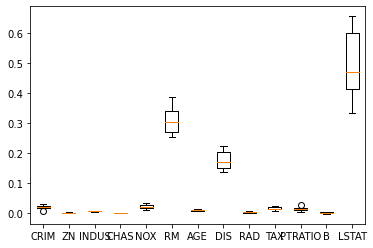

In [13]:
fig = plt.figure(facecolor = 'white')
ax = fig.add_subplot(111)

ax.boxplot(pi['importances'].transpose(), labels = X.columns)
None

#### MDI

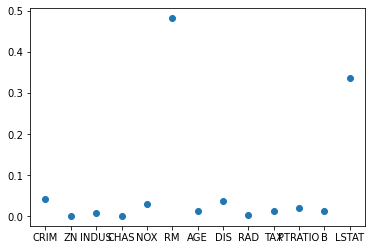

In [14]:
fig = plt.figure(facecolor = 'white')
ax = fig.add_subplot(111)

plt.scatter(X.columns, rf.feature_importances_)
None

### Kennard Stone

In [16]:
rf = clone(rf)
X_train, X_test, y_train, y_test = ks.train_test_split(X, y, test_size = 0.2)
rf.fit(X_train, y_train)
pi = permutation_importance(rf, X_test, y_test, n_repeats = 10, random_state = 334, n_jobs = -1)

#### PI

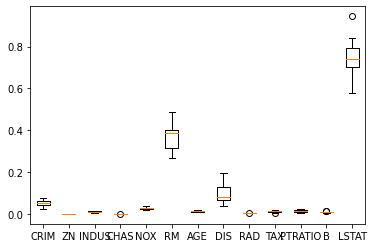

In [17]:
fig = plt.figure(facecolor = 'white')
ax = fig.add_subplot(111)

ax.boxplot(pi['importances'].transpose(), labels = X.columns)
None

#### MDI

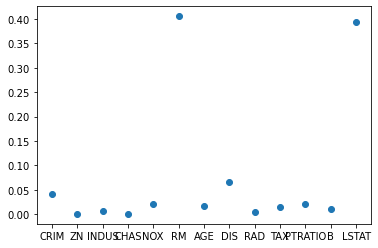

In [18]:
fig = plt.figure(facecolor = 'white')
ax = fig.add_subplot(111)

plt.scatter(X.columns, rf.feature_importances_)
None